In [54]:
pd.set_option('display.max_columns', 100)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
census = pd.read_csv('./acs2015_county_data.csv')
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [13]:
census.shape

(3220, 38)

In [2]:
census.isnull().sum(axis = 0)
census_missing = census.dropna()

In [3]:
censusC = census_missing.drop(['CensusId','State', 'County'], axis=1)
censusC.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [5]:
census_clusters = kmeans.fit(censusC)
# census_clusters.cluster_centers_

In [6]:
kmeans.inertia_
#Sum of squared distances of samples to their closest cluster center.

95702874019498.14

In [9]:
censusC['ClusterNumber'] = census_clusters.fit_predict(censusC)

In [10]:
censusC.ClusterNumber.value_counts()

0    3045
2     153
1      19
3       1
Name: ClusterNumber, dtype: int64

In [11]:
census['ClusterNumber']  = censusC['ClusterNumber'] 

In [12]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ClusterNumber
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.0
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0.0
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0.0
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0.0
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0.0


In [41]:
pd.pivot_table(census, index='ClusterNumber', columns='State', values='Unemployment', aggfunc=np.mean)

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
ClusterNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,11.367692,9.855172,12.446154,9.002703,11.167568,7.483051,7.500000,8.2,NaN,10.603774,9.989677,6.8,7.093023,7.962887,7.267778,4.595918,4.628155,9.345378,9.30,7.4375,7.30,6.333333,9.930769,4.938095,12.02439,7.60708,5.553571,3.319565,10.546667,5.8,9.190000,8.471875,7.801961,10.526804,2.681132,7.865854,6.332,10.081818,7.129310,19.370513,7.075,11.459091,5.604545,9.552174,6.70083,5.981481,5.935714,7.330000,8.964706,8.670909,6.173913,4.591304
1.0,NaN,NaN,7.700000,NaN,9.900000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,10.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.900000,NaN,NaN,NaN,NaN,NaN,10.800000,NaN,NaN,NaN,8.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.35000,NaN,NaN,NaN,6.300000,NaN,NaN,NaN
2.0,9.450000,NaN,10.000000,7.500000,10.246667,7.140000,9.266667,7.4,9.6,9.475000,9.375000,5.6,6.600000,7.575000,10.300000,5.800000,5.700000,8.400000,7.15,NaN,8.14,8.012500,9.350000,6.033333,NaN,7.50000,NaN,5.700000,9.100000,5.9,8.763636,8.400000,7.900000,8.033333,NaN,9.216667,6.250,8.233333,7.877778,NaN,9.500,8.500000,NaN,8.000000,6.51250,5.650000,NaN,5.466667,8.425000,NaN,6.133333,NaN
3.0,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
census[census.ClusterNumber == 0].State.value_counts()

Texas             241
Georgia           155
Virginia          130
Kentucky          119
Missouri          113
Kansas            103
Iowa               98
Illinois           97
North Carolina     97
Nebraska           92
Tennessee          92
Indiana            90
Minnesota          84
Mississippi        82
Ohio               82
Puerto Rico        78
Michigan           78
Oklahoma           75
Arkansas           74
Wisconsin          69
South Dakota       66
Alabama            65
Louisiana          62
Colorado           59
Pennsylvania       58
Montana            56
West Virginia      55
Florida            53
North Dakota       53
New York           51
South Carolina     44
Idaho              43
California         37
Washington         34
Oregon             33
New Mexico         32
Alaska             29
Utah               27
Wyoming            23
Maryland           19
Maine              16
Nevada             15
Vermont            14
Arizona            13
New Jersey         10
New Hampsh

In [50]:
from sklearn.cluster import AgglomerativeClustering

census_sample = censusC.sample(n=100)
hier_clust = AgglomerativeClustering(linkage='ward')
census_hier = hier_clust.fit(census_sample)

In [51]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

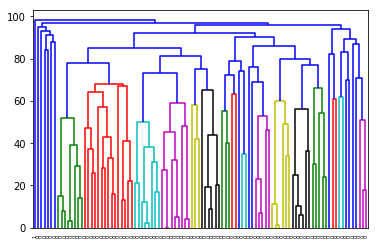

In [52]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(census_hier, labels=census_hier.labels_)

In [53]:
census_hier.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])